# World Happiness Reports 2005 - 2020 - Linear Regression
## by Maxwell Grant

Database: World Happiness Reports 2021 Data Panel. Includes history from 2005 to 2020.

Link: https://worldhappiness.report/ed/2021/

Download Link: https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls

Data Dictionary: Statistical Appendix 1 (in GitHub)

"Region indicator", "Latitiude", and "Longitude" were added to "DataPanelWHR2021C2" dataset for the Tableau Dashboard. Remove those columns from the "drop" list or use the database in my GitHub that includes those three columns.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Read the csv file to a dataframe.

In [2]:
df = pd.read_csv('DataPanelWHR2021C2.csv')

In [3]:
df.head(3)

,Country name,Regional indicator,Latitude,Longitude,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,25.0376,76.4563,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,25.0376,76.4563,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,25.0376,76.4563,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,0.618,0.275


In [4]:
df.columns.values

array(['Country name', 'Regional indicator', 'Latitude', 'Longitude',
       'year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'], dtype=object)

Create lists of columns not being used, X variables, and percintiles for ECDF plotting.

In [5]:
drop = ['Country name', 'Regional indicator', 'Latitude', 'Longitude', 'year']
variables = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
            'Perceptions of corruption', 'Positive affect', 'Negative affect']
percentiles = np.array([2.5, 25, 50, 75, 97.5])

Drop columns not being used and rows with null values.

In [6]:
df = df.drop(drop, axis=1)
df = df.dropna()

Exploratory Data Analysis

In [7]:
def ecdf(data):
    num = len(data)
    x = np.sort(data)
    y = np.arange(1, num+1) / num
    return x, y

In [8]:
variables

['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

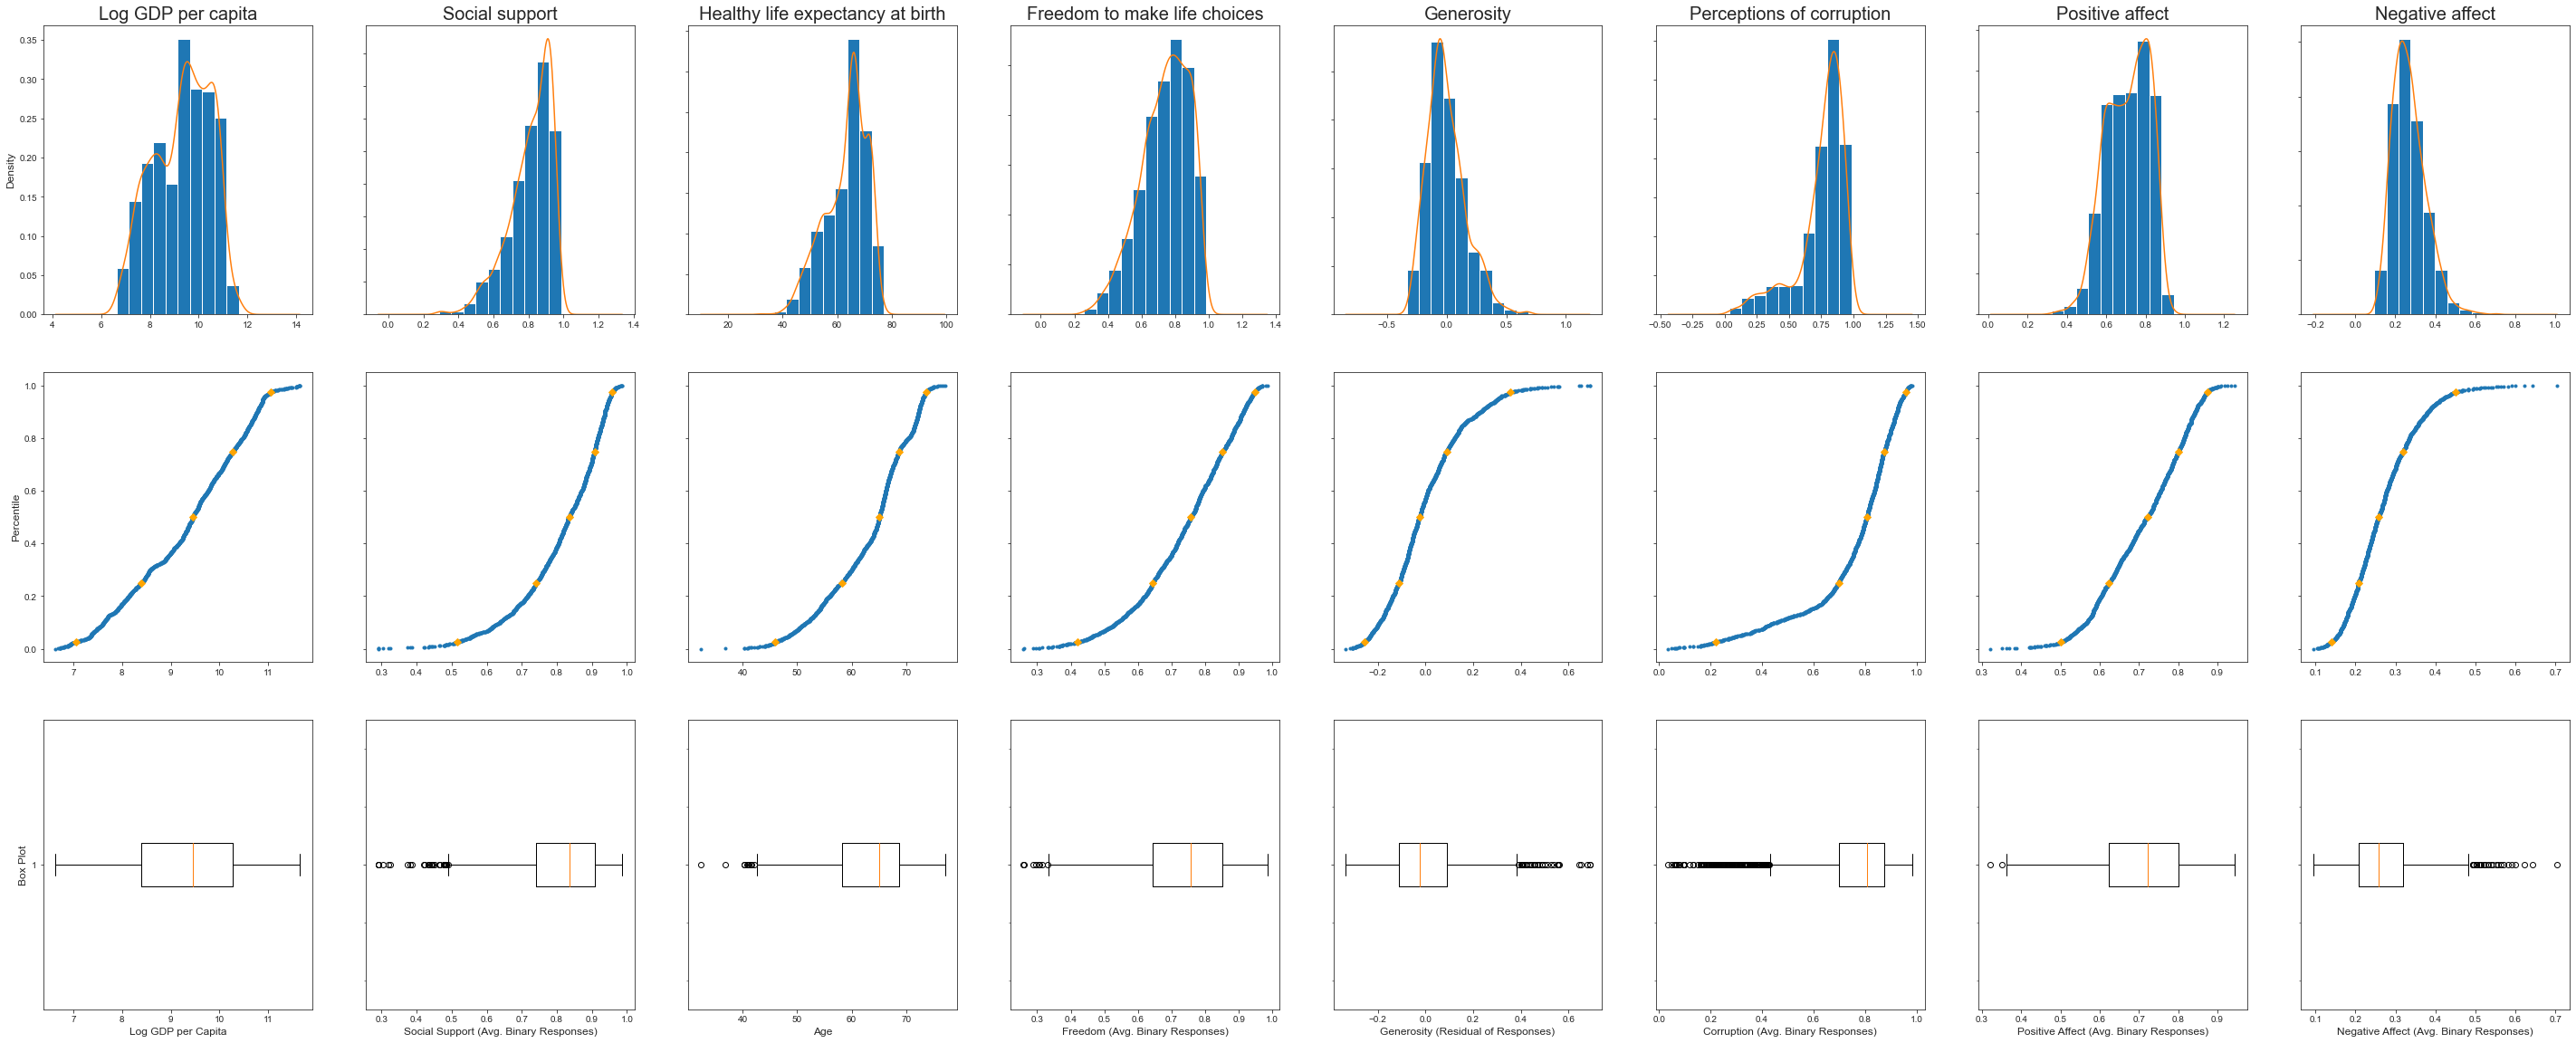

In [9]:
sns.set_style("ticks")
unitsDict = {'Log GDP per capita':'Log GDP per Capita', 'Social support':'Social Support (Avg. Binary Responses)', 
             'Healthy life expectancy at birth': 'Age', 'Freedom to make life choices': 'Freedom (Avg. Binary Responses)',
             'Generosity':'Generosity (Residual of Responses)', 'Perceptions of corruption':'Corruption (Avg. Binary Responses)', 
             'Positive affect':'Positive Affect (Avg. Binary Responses)', 'Negative affect':'Negative Affect (Avg. Binary Responses)'}

fig, ax = plt.subplots(3,len(variables))
fig.set_size_inches([50,20])

for i in range(0, len(variables)):
    
    ax[0,i].set_title(variables[i], fontsize = 20)

    #Histogram with KDE
    df[variables[i]].plot.hist(ax=ax[0,i], density = True, bins = 10, sharey=ax[0,0])
    df[variables[i]].plot.kde(ax=ax[0,i], legend = False, sharey=ax[0,0])
    
    
    #ECDF
    x, y = ecdf(df[variables[i]])
    ax[1, i].plot(x, y, marker = '.', linestyle = 'none')
    ptiles = np.percentile(df[variables[i]], percentiles)
    ax[1, i].plot(ptiles, percentiles/100, marker = 'D', color ='orange', linestyle='none')
    
    #Box Plot
    ax[2, i].boxplot(df[variables[i]], vert = False)
    ax[2, i].set_xlabel(unitsDict.get(variables[i]), fontsize = 'large')

    
ax[0, 0].set_ylabel('Density', fontsize = 'large')
ax[1, 0].set_ylabel('Percentile', fontsize = 'large')
ax[2, 0].set_ylabel('Box Plot', fontsize = 'large')

plt.show()

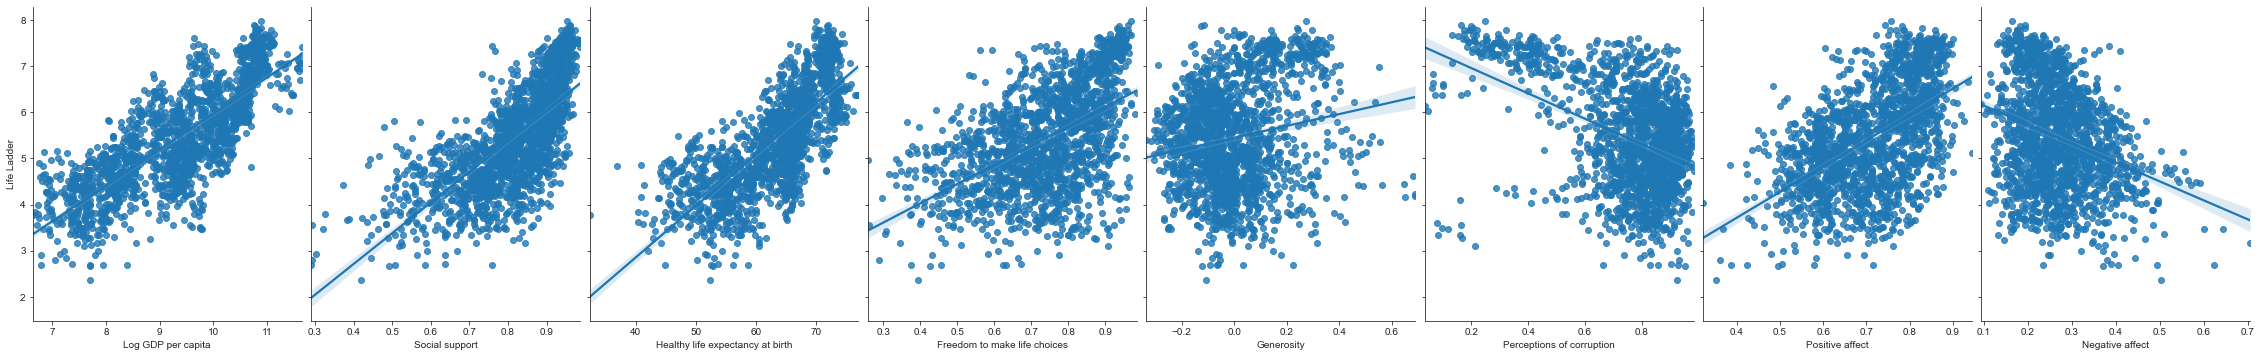

In [10]:
sns.pairplot(df, x_vars=variables, y_vars=['Life Ladder'], height=5, aspect=.8, kind="reg");

In [11]:
df.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.00000,1708.000000
mean,5.446680,9.321709,0.810321,63.225465,0.739442,-0.000638,0.750996,0.70955,0.269446
std,1.136592,1.158344,0.121638,7.687011,0.142846,0.162103,0.186028,0.10819,0.083083
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.32200,0.094000
25%,4.595000,8.394000,0.741000,58.175000,0.644000,-0.111250,0.697000,0.62300,0.208000
50%,5.364000,9.456500,0.835000,65.100000,0.757500,-0.025500,0.806000,0.72200,0.259000
75%,6.259000,10.272000,0.908000,68.685000,0.852000,0.089000,0.875000,0.80125,0.319250
max,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,0.94400,0.705000


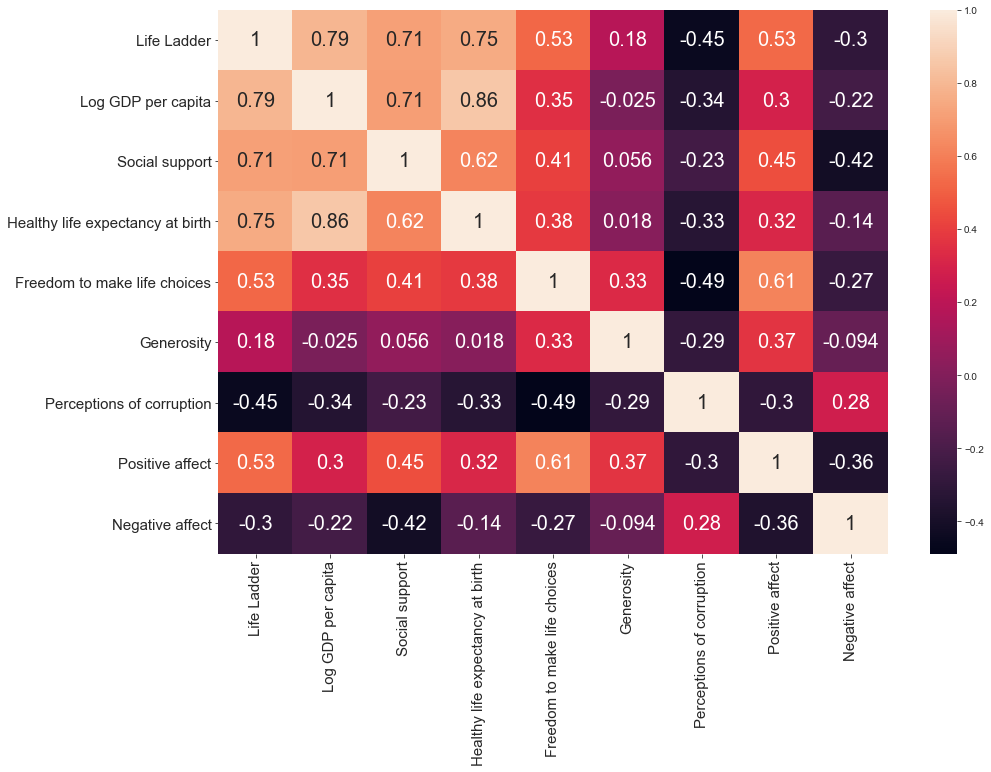

In [12]:
correlation = df.corr() 
plt.figure(figsize=(15,10))
sns.heatmap(correlation, xticklabels=correlation, yticklabels=correlation.columns.values, annot = True, annot_kws={'size':20})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Prepare the data to be tested. Drop columns not required. Separate x-variables and the y-variable.

In [13]:
X = df.drop('Life Ladder',axis=1) 
y = df['Life Ladder']  

Split the data into training and testing data set. This model tests with 60% training and 40% testing.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)  

Initiate model and feed training data

In [15]:
model = LinearRegression() 
model.fit(X_train,y_train)  

LinearRegression()

In [16]:
test_predictions = model.predict(X_test)

Calculate evaluation metrics

In [17]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
R_SQR = r2_score(y_test, test_predictions)
yInt = model.intercept_

In [18]:
dfCoeff = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
dfEval = pd.DataFrame(columns = ['Evaluation Metrics'])
dfEval.loc['Y-Intercept'] = yInt
dfEval.loc['R-Squared'] = R_SQR
dfEval.loc['Mean Absolute Error'] = MAE
dfEval.loc['Mean Squared Error'] = MSE
dfEval.loc['Root Mean Square Error'] = RMSE

In [19]:
dfStd = df.describe()
dfStd = dfStd[variables].transpose()
dfCoeff['St Dev'] = dfStd['std']
dfCoeff['Importance'] = (dfCoeff['Coefficient'] * dfCoeff['St Dev']).abs()
dfCoeff = dfCoeff.sort_values('Importance', ascending = False)

Dataframes of variable coefficients and evaluation metrics.

In [20]:
dfCoeff

,Coefficient,St Dev,Importance
Log GDP per capita,0.422932,1.158344,0.489901
Social support,1.968834,0.121638,0.239484
Positive affect,2.036391,0.108190,0.220318
Healthy life expectancy at birth,0.022498,7.687011,0.172939
Generosity,0.704876,0.162103,0.114263
Perceptions of corruption,-0.581110,0.186028,0.108102
Freedom to make life choices,0.270251,0.142846,0.038604
Negative affect,0.206305,0.083083,0.017140


In [21]:
dfEval

,Evaluation Metrics
Y-Intercept,-2.767891
R-Squared,0.768328
Mean Absolute Error,0.421232
Mean Squared Error,0.295875
Root Mean Square Error,0.543944


Bar graph of the most important feautres to the model

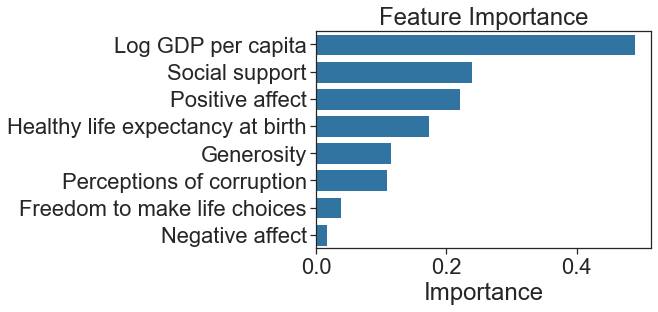

In [22]:
sns.set(font_scale = 2)
sns.set_style("ticks")
sort = dfCoeff.sort_values('Importance')
sns.barplot(x='Importance', y=dfCoeff.index, data=dfCoeff, color="tab:blue").set(title='Feature Importance')
plt.show()

Evaluation: This model is a good fit with a r-squared of 77%. In the domain of human analytics, 77% is a high score. We also learned the GDP variable has the most significance to the life ladder score and the negative affect variable does not significantly affect the life ladder score.

Linear Regression: ScoreHat = .42(GDP) + 1.97(S) + 2.03(P) + .02(H) + .70(G) - .58(C) + .27(F) + .21(N) - 2.77 

GDP = Log GDP per Capita, S = Social Support, P = Positive Affect, H = Health Life Expectancy at Birth, G = Generosity, C = Perceptions of Corruption, F = Freedom to Make Life Choices, n = Negative Affect